**<h1> Sign Language Through Computer Vision**


The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

In the given problem statement , we will be reshaping the given data such that it represents the images on plotting. Next, we will be training the convolutional neural networks 2D on the dataset to the get our required output.

**<h2> Importing the Libraries**


**1) Numpy:**Using this library , one can easily work with arrays and multidimensional matrices and also apply various other mathematical operations with them.

**2) Pandas:**Especially designed for data analysis and manipulation.

**3) Matplotlib:**It is the plotting library for python programming language.

**4) Seaborn:**It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**<h2> Uploading Dataset**

The below command is used to upload the required dataset from one's computer. It then transforms it into a dataframe.We do this in order to interact with the data effectively. The dataframe will be made accessible by variable df.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
import io
train = pd.read_csv(io.StringIO(uploaded['sign_mnist_train.csv'].decode('utf-8')))

**Uploading Test Images**



In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io
test = pd.read_csv(io.StringIO(uploaded['sign_mnist_test.csv'].decode('utf-8')))

The next line of code helps print the first 5 rows of data.

In [0]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


**<h2> Data Analysis**

We will be studying the label parameter of the given dataset so as to understand its relation the pictures.

In the next line, we are going to see the unique labels we have and save them in the unique_labels variable for future use.

In [0]:
labels=train['label']
unique_labels=np.unique(np.array(labels))
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

**<h3> CountPlots**

Countplots are members of the seaborn data visualization library. They are generally used to represent the total number of times a particular value is coming in a the given data. It then segregrates each element of data and plots it as an histogram to show the total number of occurences of the values.

**<h4>Countplot:Labels**


Next, we will be studying the frequency of each label by using a countplot.

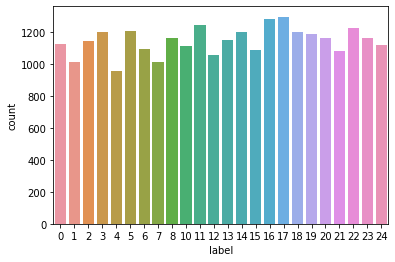

In [0]:
sns.countplot(train['label'])

**<h2> Data Analysis Conclusion**

From the above visualisation it can be seen that the labels are equally distributed across the dataset.

**<h2>Cleaning and Reconstructing Data**

As it can be seen from the given dataset that there are accounts of 784 pixels describing one picture . We will be sepearating the pixels and resizing them in order to obtain the required image.

In [0]:
train_cpy=train.copy()
pixels=train.drop('label',axis=1,inplace=True)
pixels=train.values
pixels = np.array([np.reshape(i, (28, 28)) for i in pixels])
pixels = np.array([i.flatten() for i in pixels])

**<h3> Label Binarizer**

Label Binarizer is an SciKit Learn class that accepts Categorical data as input and returns an Numpy array. Unlike Label Encoder, it encodes the data into dummy variables indicating the presence of a particular label or not. 

We will be using this to remove bias from the machine in the given case of labels.
Fit_transform, will first transform the data and then fit it to the labels list.

In [0]:
from sklearn.preprocessing import LabelBinarizer
binary_labels = LabelBinarizer()
labels = binary_labels.fit_transform(labels)

**<h3>Plotting the image using matplotlib**

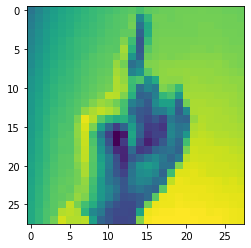

In [0]:

plt.imshow(pixels[0].reshape(28,28))

**<h2>Splitting Data**

We split the data into x_train,x_test,y_train and y_test respectively by model_selection present in sklearn library.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pixels, labels, test_size = 0.3, random_state = 101)



**<h3> Deep Learning Model**

Next we will be applying Deep Learning on the model. 
For the same purpose , we will be importing the keras library.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


Using TensorFlow backend.


We will be declaring a class called myCallback which will be controlling the training of the dataset. In this case if the accuracy of our model reaches 99% or above , we will stop the training.

In [0]:
class myCallback(keras.callbacks.Callback):
  def _on_epoch_end(self,epoch,log={}):
    if(logs.get(acc)==0.99):
      print("Reached 99% stopping training")
      self.model.stop_training=True

callback=myCallback()

Next we will be defining some important variables for the training namely, batch size,epochs and number of classes.
Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
Epochs refers to the number of iterations which we will be running.

In [0]:
batch_size = 128
num_classes = 24
epochs = 50


**<h4> Data Preprocessing and Normalization**

Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. We will be doing so by dividing the given pixel values by 255.
This will be followed by reshaping the data,to ensure none of the images are out of proportion.

In [0]:
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)



**Plotting the given values using matplotlib**

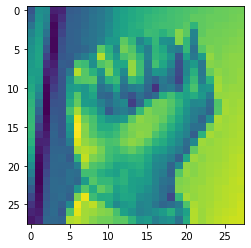

In [0]:
plt.imshow(x_train[0].reshape(28,28))



**<h3>Implementing Deep Learning Model:Convolutional Neural Network**

Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

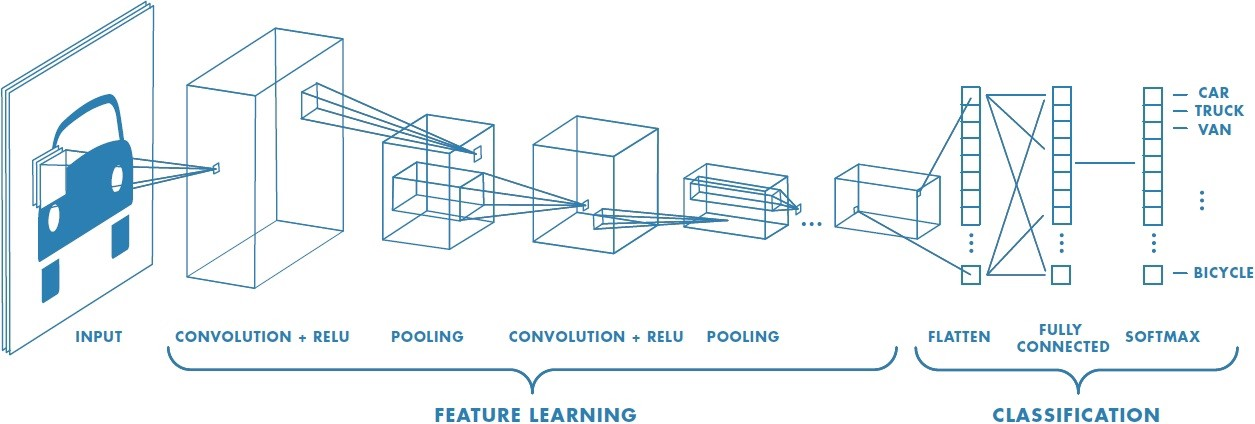


In our case we will be using it to identify labels associated with the images.

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

The above model shows the layers and the total number of parameters they will be dealing with.

**<h3>Fitting the model**

In [0]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size,callbacks=[callback])


Train on 19218 samples, validate on 8237 samples
Epoch 1/50





19218/19218 [==============================] - 27s 1ms/step - loss: 2.7694 - acc: 0.1495 - val_loss: 2.0107 - val_acc: 0.3509
Epoch 2/50
19218/19218 [==============================] - 26s 1ms/step - loss: 1.6315 - acc: 0.4631 - val_loss: 1.1058 - val_acc: 0.6547
Epoch 3/50
19218/19218 [==============================] - 26s 1ms/step - loss: 0.9891 - acc: 0.6641 - val_loss: 0.6655 - val_acc: 0.7873
Epoch 4/50
19218/19218 [==============================] - 26s 1ms/step - loss: 0.6640 - acc: 0.7729 - val_loss: 0.4732 - val_acc: 0.8428
Epoch 5/50
19218/19218 [==============================] - 26s 1ms/step - loss: 0.4487 - acc: 0.8498 - val_loss: 0.3048 - val_acc: 0.9041
Epoch 6/50
19218/19218 [==============================] - 26s 1ms/step - loss: 0.3270 - acc: 0.8898 - val_loss: 0.1859 - val_acc: 0.9505
Epoch 7/50
19218/19218 [==============================] - 26s 1ms/step - loss: 0.2405 - acc: 0.9207 - val_loss: 0.1366 - val

KeyboardInterrupt: ignored

**<h3>Studying the accuracy per epoch**

We shall study the accuracy per epoch by plotting them against each other. Using this we might try to vary the parameters inputed , incase it does not meet our requirements.

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()


The above graph depicts a good performance of the model , hence the parameters feeded are seemingly fine.

**<h2> Testing the model on data**

**<h2> Data Processing**

In order to perform the test we need to make the given data fit for the model to be applied on it. Hence we will be applying the same preprocessing on it as perfomed on training data.

This will be involving dropping the labels from the dataset, saving the pixels as separate values and reshaping them, followed by binarizing the labels.

In [0]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape



**<h2> Predicting the accuracy**

We will be fitting the model on the given model , in order to make predictions. This will be followed by predicting the accuracy of the given model.

In [0]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())



**<h3> Conclusion**

From the above training we got a model which can successfully recognize sign language alphabets with an accuracy of 83%. This can help establish communication with the deaf.